**Application 2.11. Spurious frequency components: When the number of DFT points is not a multiple of the signal period.**


---


Figure bellow illustrates the DTFS spectrum of a signal $x[n]=8\sin(12(2\pi/32)n)$ with period of 6 samples obtained via a 16-points DFT. Note that because 16 is not a multiple of 6, the spectrum has many non-zero spurious components. The coefficients $X[3]=0.99-1.48j$ and $X[-3]=0.99 + 1.48j$, both with magnitude 1.78, are the closest to representing the angle $\frac{\pi}{3}≈ 1.05$ rad. In fact, when using $N=16$ points to divide , the angle increment is
$$
ΔΩ=\frac{2\pi}{N}
$$

which in this case is $ΔΩ=\frac{\pi}{8}≈0.39$, and the DFT / DTFS can deal only with the angles $[0,0.39,0.78,1.18,1.57,...,5,89]$ rad. This explains why $X[3]$ and $X[-3]$ are concentrating most of the power $P=\frac{4²}{2}$ . The other coefficients absorb the remaining power that “leaks” due to the imperfect match of the cosine frequency $\frac{\pi}{3}$ with the discrete grid of 16 points imposed by the DFT / DFTS.


#Python Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 16  # number of DFT points is not a multiple of 6
n = np.arange(N)  # abscissa to generate signal below

# Generate signal x[n]
x = 4 * np.cos((2 * np.pi / 6) * n)


# Calculate DFT of x
X = np.fft.fft(x) / N

# Mask numerical errors
X[np.abs(X) < 1e-12] = 0 #discard small values (numerical errors)
X = np.fft.fftshift(X) #rearrange to represent negative freqs.

k=np.arange(-N/2,N/2,1) #range with negative k (assume N is even)


GRAPHICS

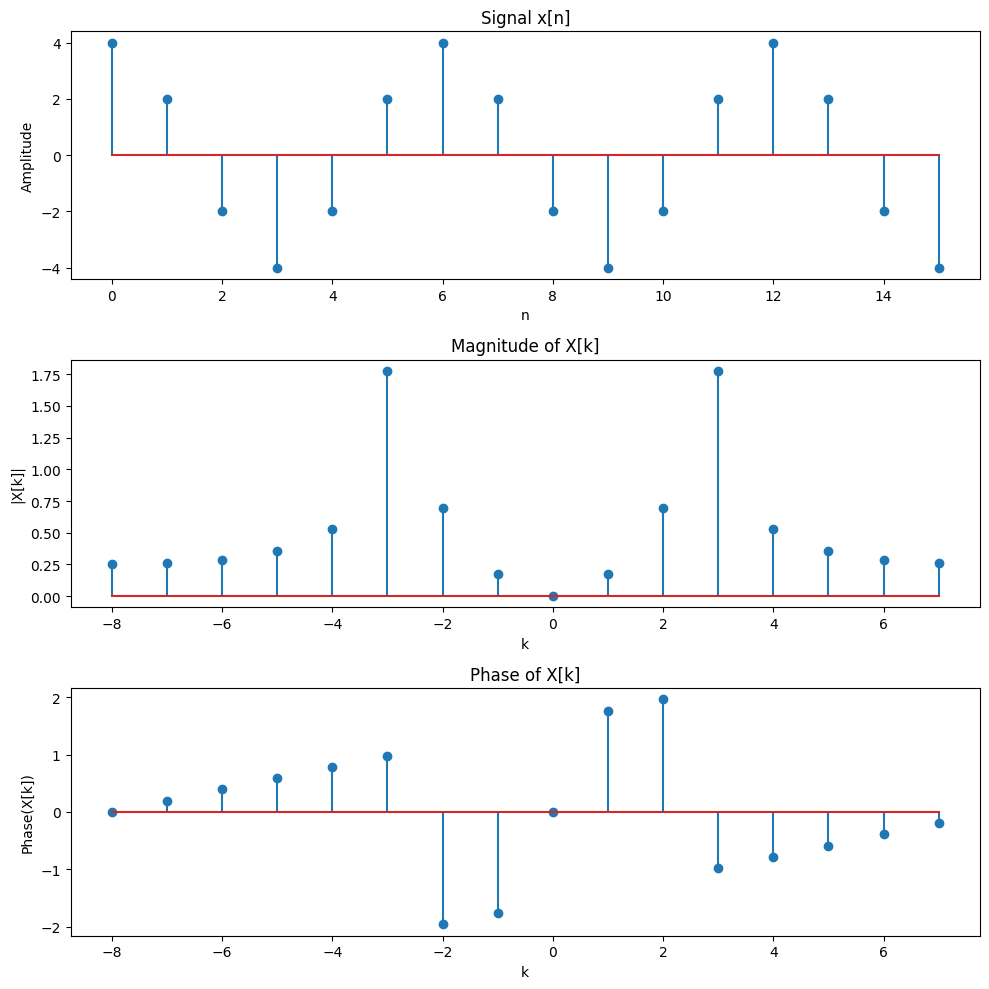

In [2]:
# Plot x[n]
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Signal x[n]')

# Plot magnitude of X[k]
plt.subplot(3, 1, 2)
plt.stem(k, np.abs(X))
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('Magnitude of X[k]')

# Plot phase of X[k]
plt.subplot(3, 1, 3)
plt.stem(k, np.angle(X))
plt.xlabel('k')
plt.ylabel('Phase(X[k])')
plt.title('Phase of X[k]')

plt.tight_layout()
plt.show()


The creation of spurious components is associated to leakage and the picket-fence effect. This phenomenon is very common when using the FFT to analyze signals that are non-periodic, have infinite duration, etc. In the current case, the spurious components could be avoided by choosing an appropriate number of points for the DFT / DTFS (a multiple of 6). In practice, spurious components due to FFT usage occur most of the times. Even when the original signal is periodic, say $x(t)$ with period , it is typically not guaranteed that $NT_s$ is a multiple of $T$, where $N$ is the number of DFT points and $T_s$ the sampling period.